<a href="https://colab.research.google.com/github/keeponing/py2_aider/blob/main/04_%E9%96%8B%E7%99%BA/04_05_jockey_%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install tempfile2
import warnings
warnings.filterwarnings('ignore')

E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mdbtools is already the newest version (1.0.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:

# 使用例
table_name = 'JockeyScore'  # テーブル名を指定

years = range(2000, 2026)

k_a_util.prepare_pd_on_notebook()

dict_statistics={}
filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_score.accdb'
df_summary = k_a_util.read_table(filepath, table_name)
df_summary = df_summary.sort_values(by='js_year')



In [5]:
df_summary.head()

,js_id,js_year,js_race_count,js_win_score,js_mul_score,js_win_count,js_mul_count
0,00000,2000,25620,0.097150661,0.2905933,2489,7445
4348,05098,2000,10,0.1,0.1,1,1
4361,05099,2000,2,0,0,0,0
4364,05100,2000,7,0,0,0,0
4367,05101,2000,4,0,0.5,0,2


In [57]:
import pandas as pd

def calculate_yearly_statistics_per_column(df, columns):
    # 基本統計量を計算する関数
    def calculate_statistics(sub_df):
        stats = {
            'mean': sub_df.mean(),
            'std': sub_df.std(),
            'max': sub_df.max(),
            'min': sub_df.min(),
            'median': sub_df.median(),
            'mode': sub_df.mode().iloc[0] if not sub_df.mode().empty else None
        }
        return stats

    # js_year列を整数型に変換
    df['js_year'] = df['js_year'].astype(int)

    # 対象の列を数値型に変換
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    # 辞書型を初期化
    statistics_dict = {}

    # 各列について基本統計量を計算
    for column in columns:
        result = {}
        years = sorted(df['js_year'].unique())
        for year in years:
            previous_year = year - 1
            data = df[df['js_year'].isin([previous_year, year])][column]
            result[year] = calculate_statistics(data)

        statistics_df = pd.DataFrame(result).T
        statistics_dict[column] = statistics_df

    return statistics_dict


In [ ]:

# k_a_util.prepare_pd_on_notebook()

# dict_statistics = {}
# filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_score.accdb'
# df_summary = k_a_util.read_table(filepath, table_name)
# df_summary = df_summary[df_summary['js_id'] != '00000']
# df_summary = df_summary.sort_values(by='js_year')


# df_group_y = df_summary.groupby('js_year')

# for year, group in df_group_y:
#     plt.figure(figsize=(36, 3))  # Create a new figure for each year
#     group['js_race_count'] = group['js_race_count'].astype(int)
#     group = group.sort_values(by='js_race_count')  # Sort by js_race_count in ascending order
#     sns.histplot(group['js_race_count'], bins=30, kde=True)
#     plt.title(f'Histogram of js_race_count for {year}')
#     plt.xlabel('js_race_count')
#     plt.ylabel('Frequency')
#     plt.xticks(fontsize=10)  # Rotate X-axis labels by 90 degrees
#     plt.show()


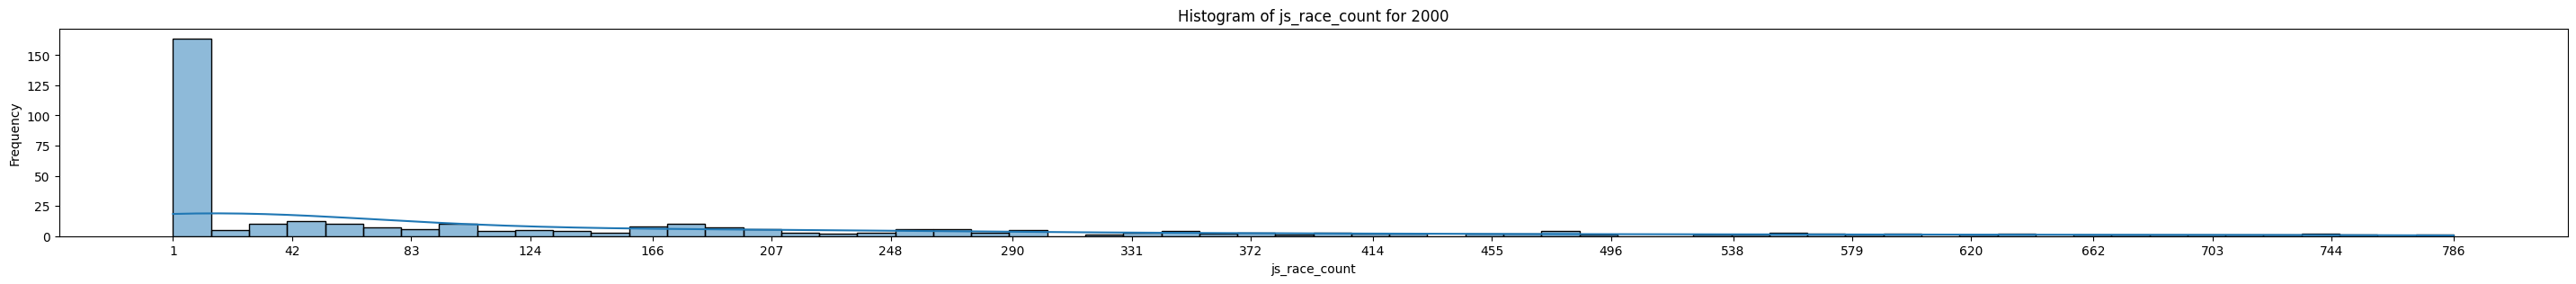

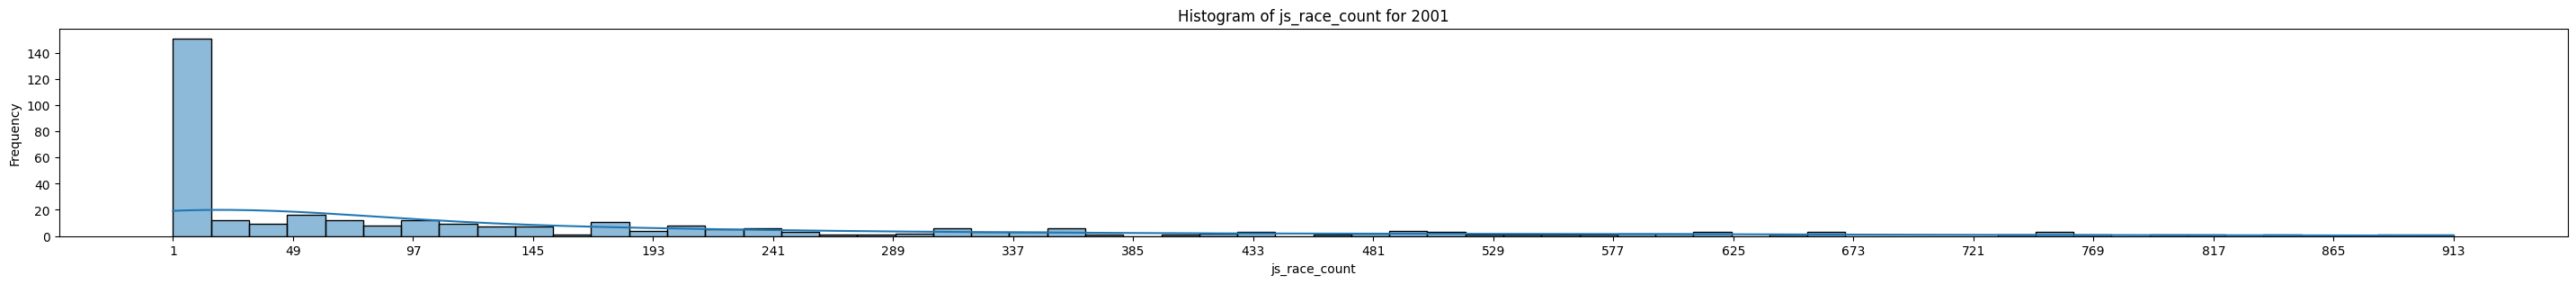

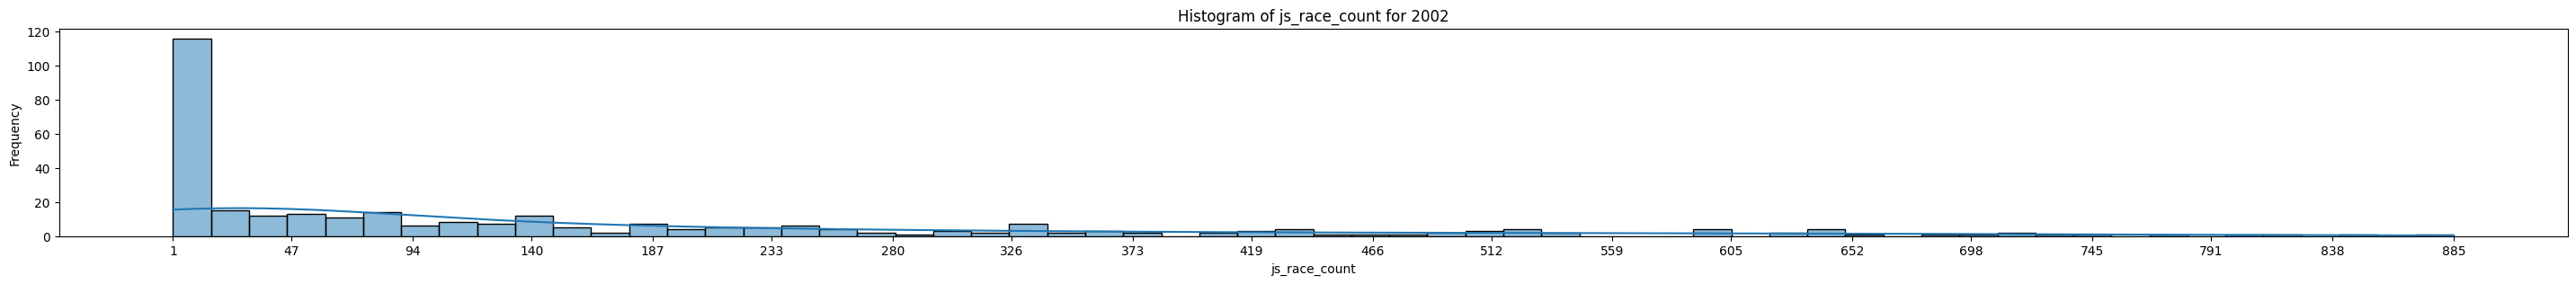

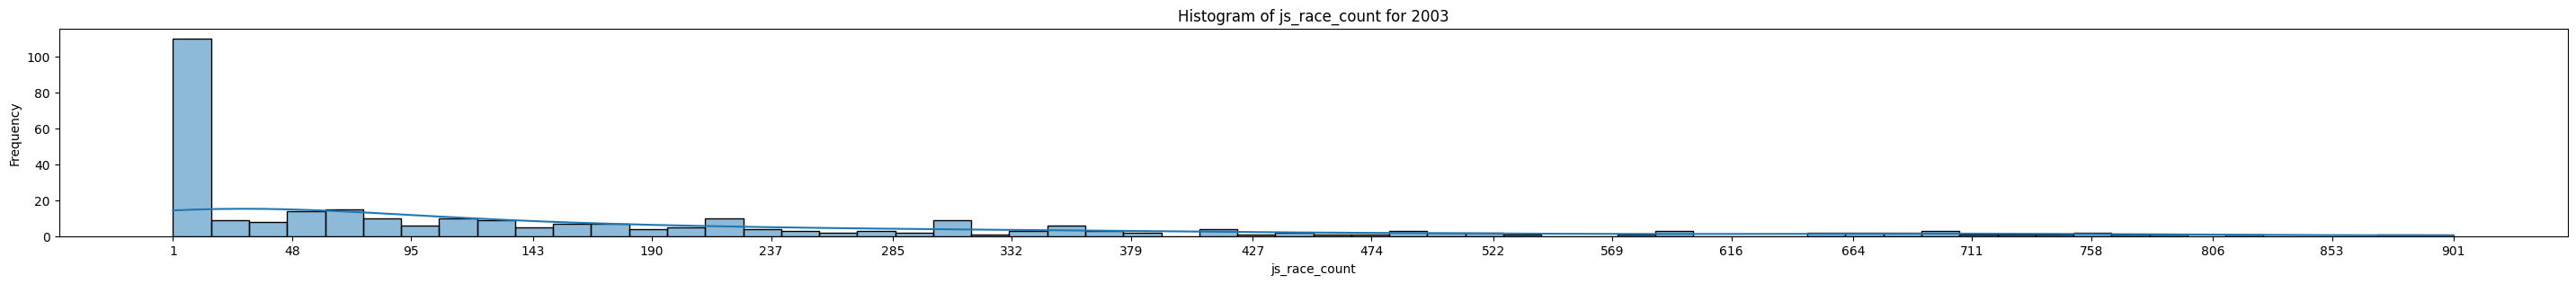

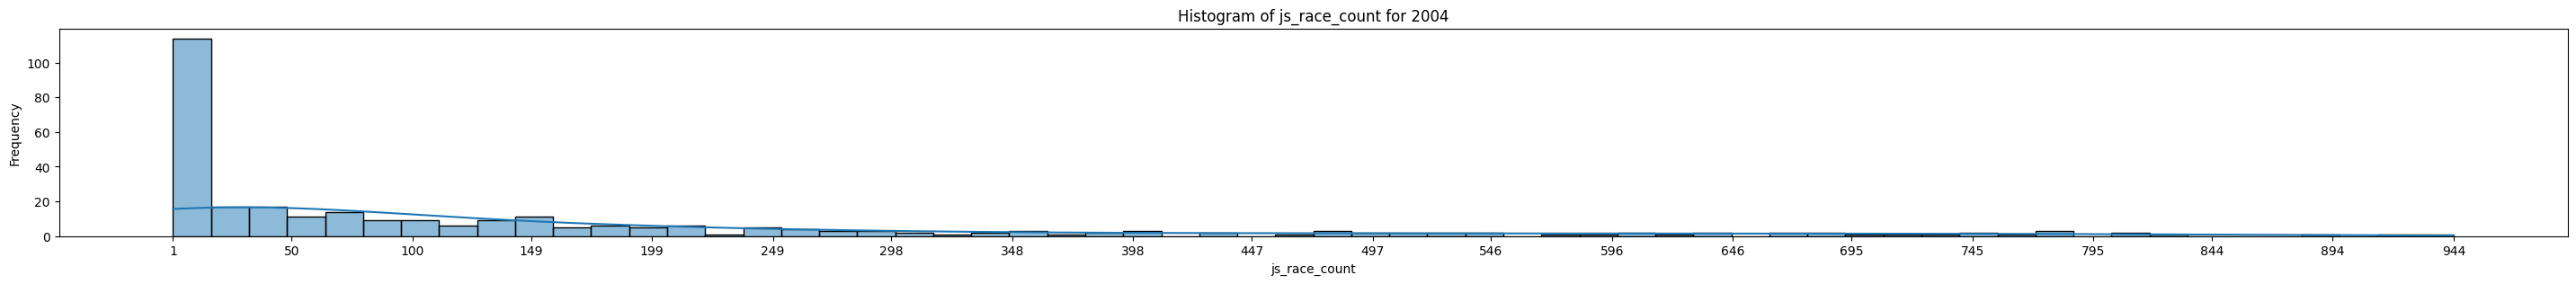

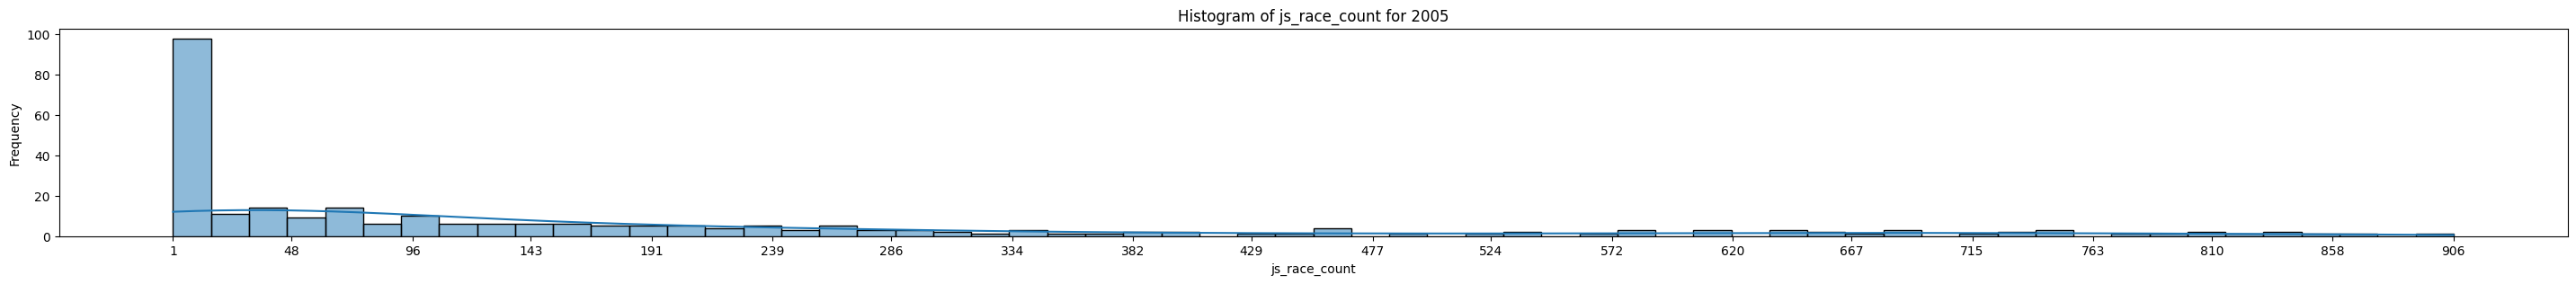

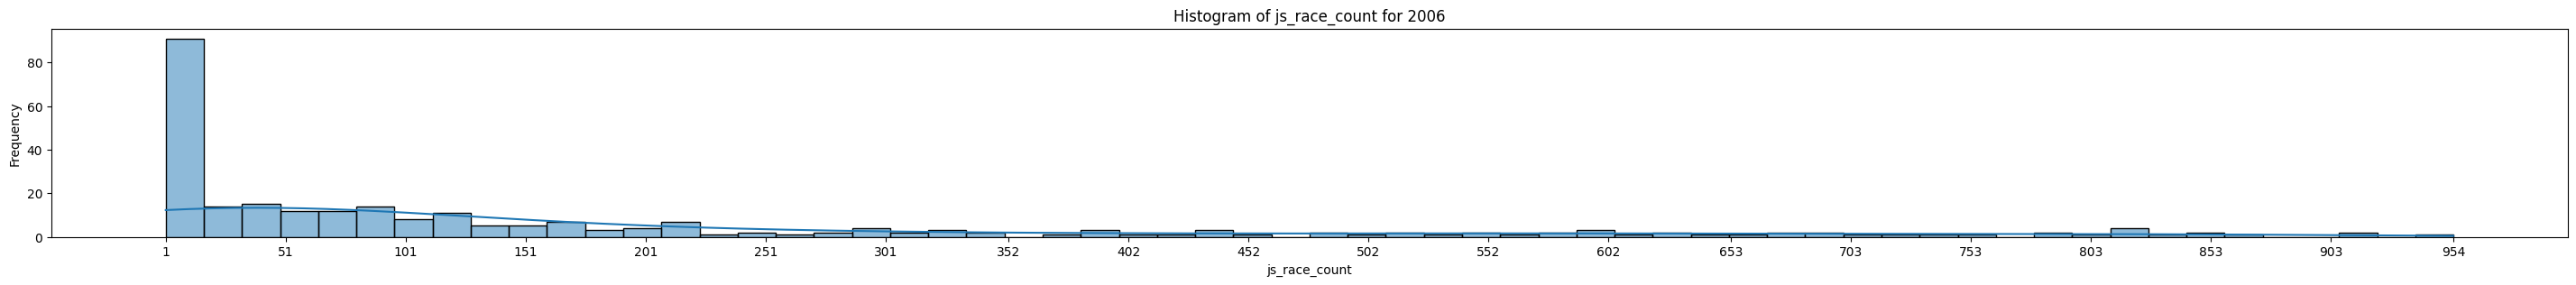

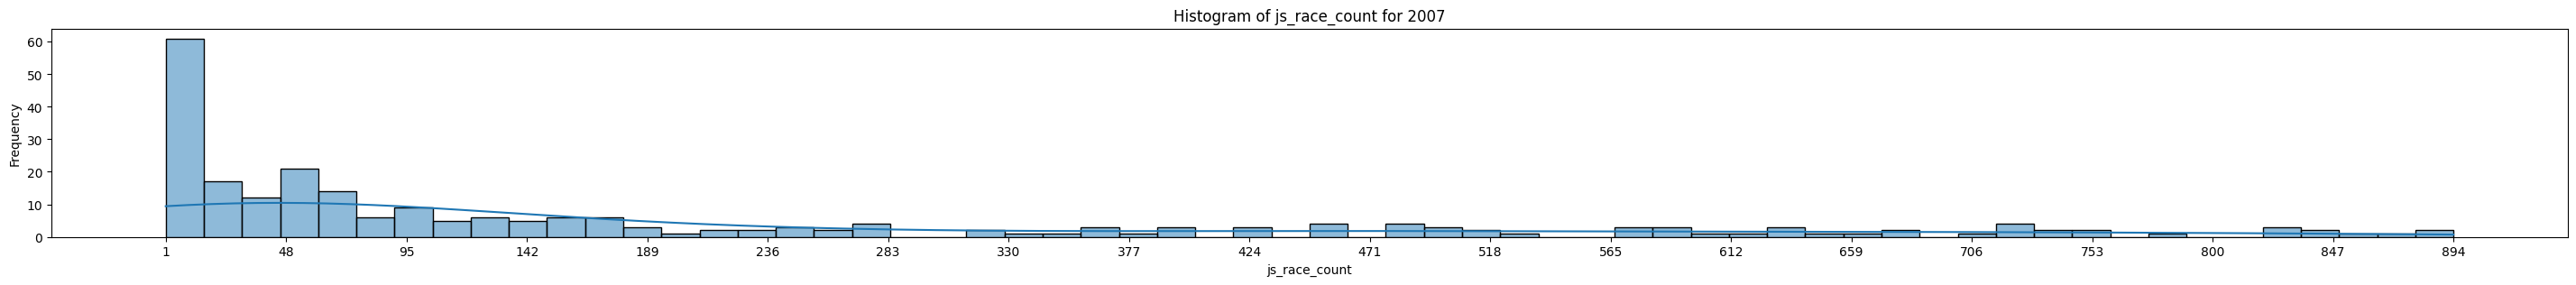

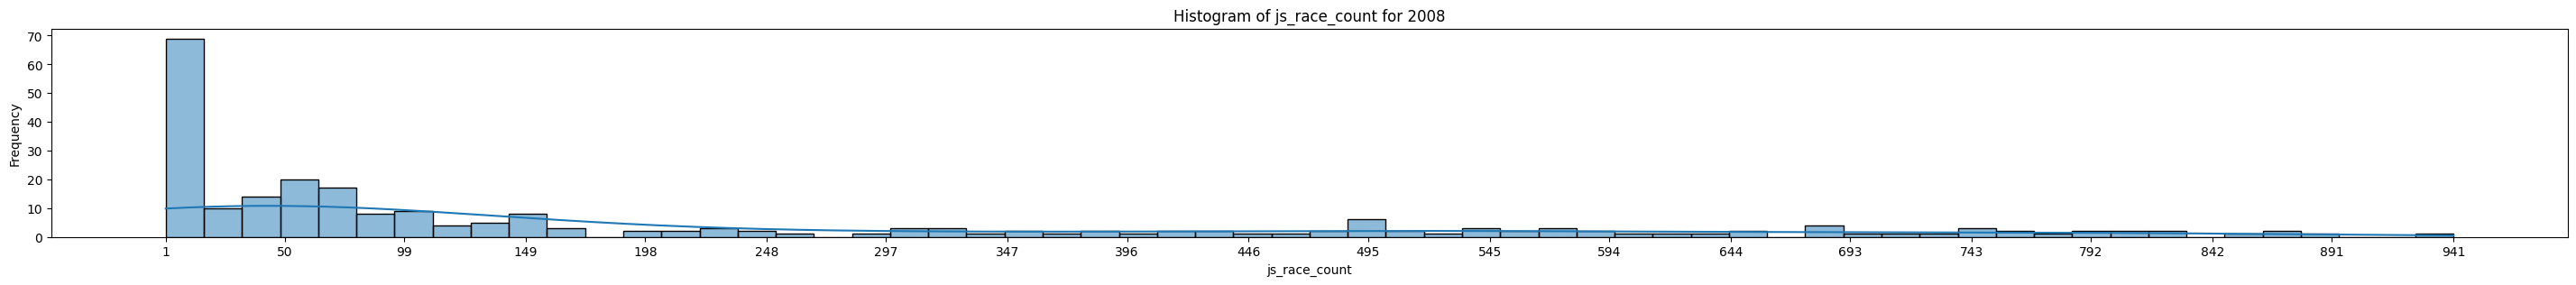

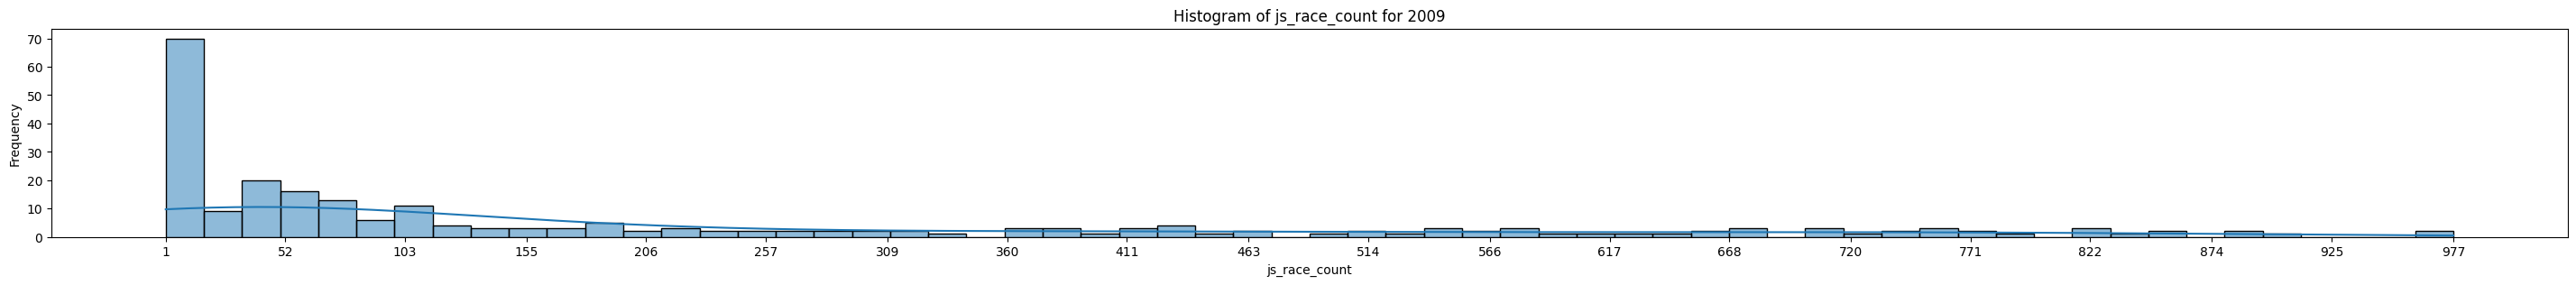

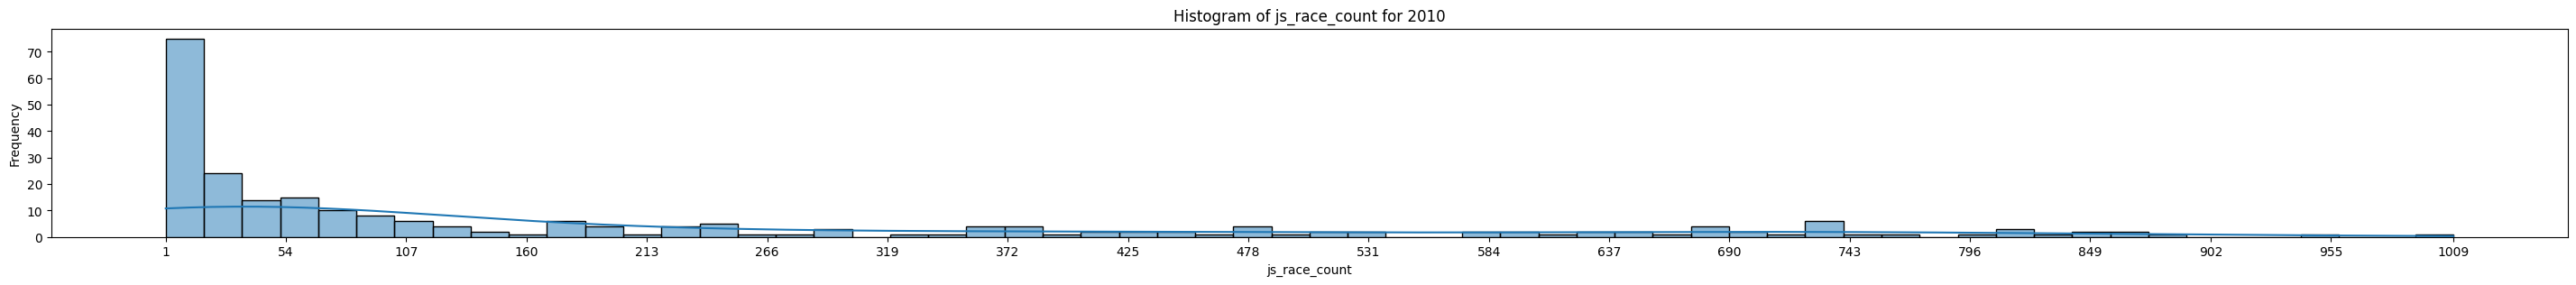

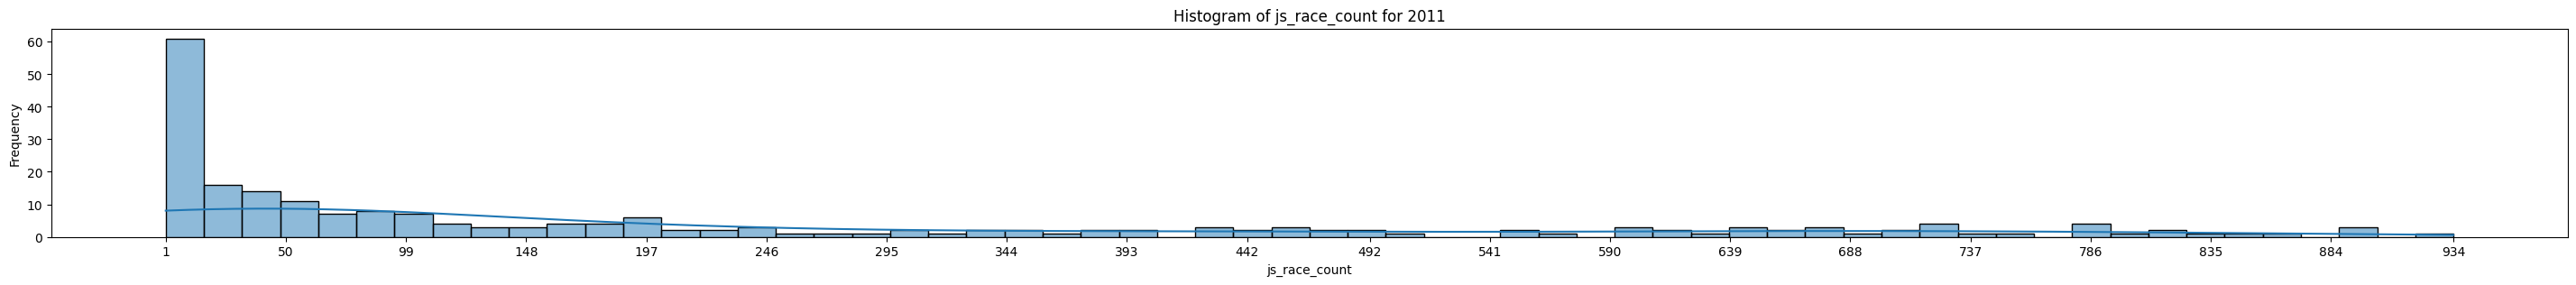

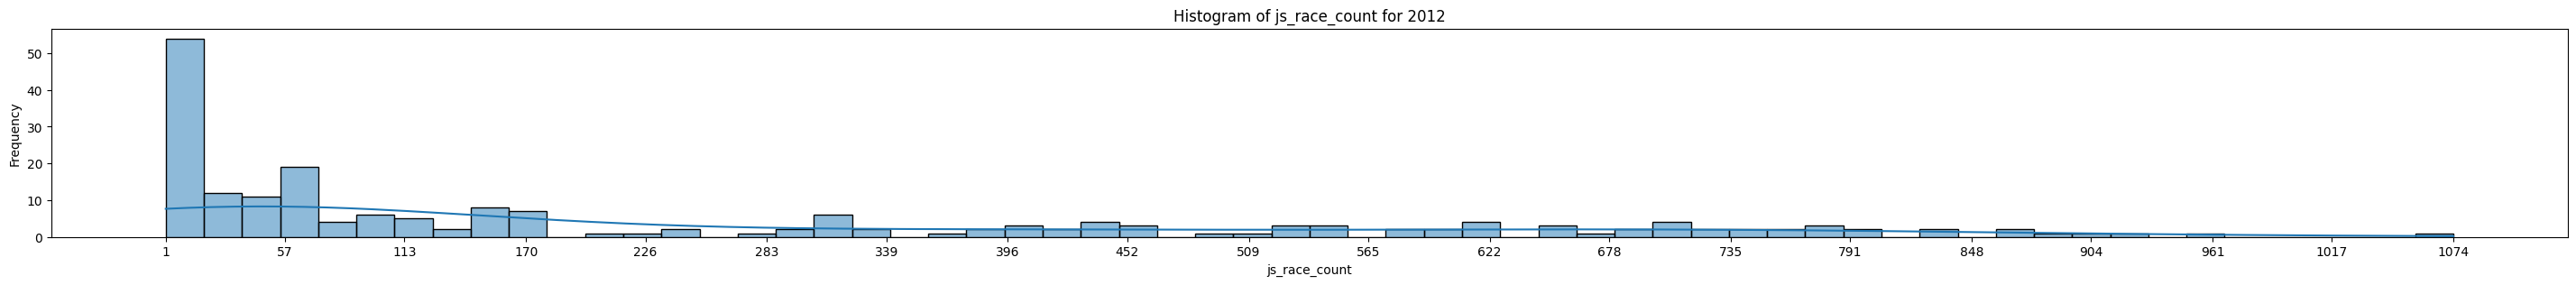

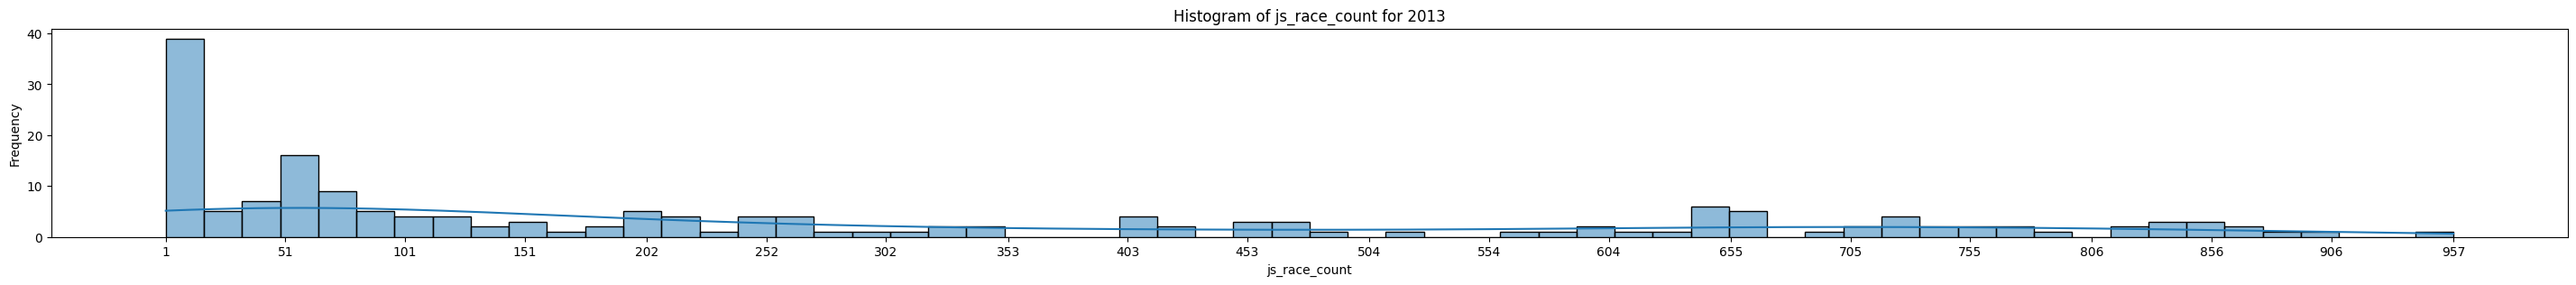

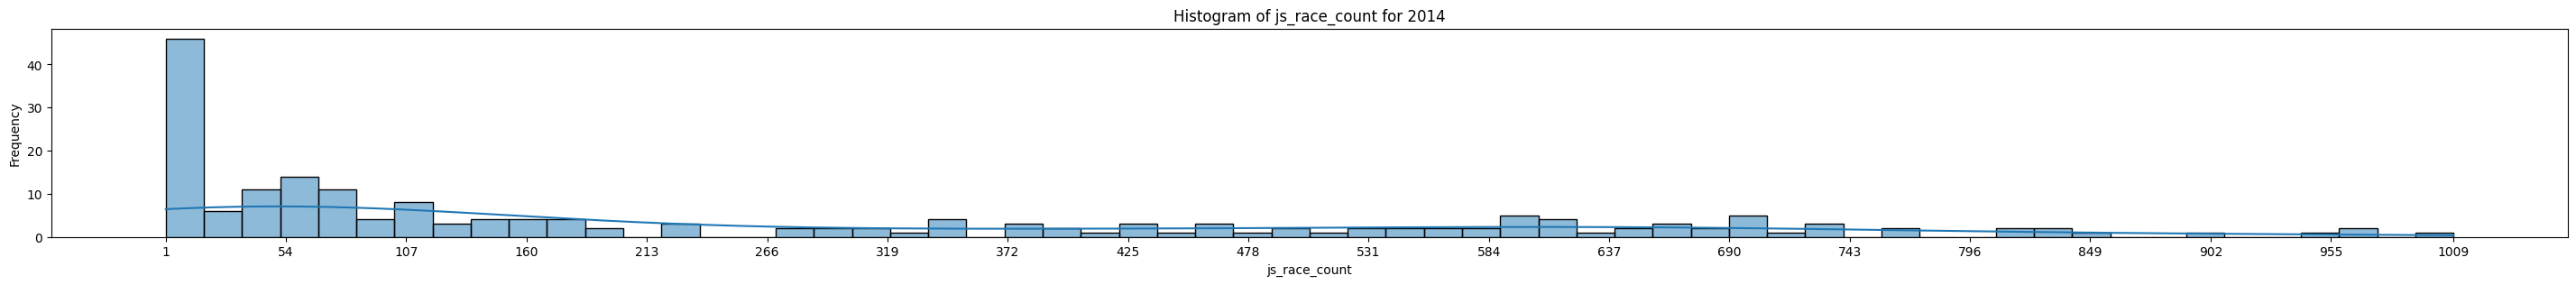

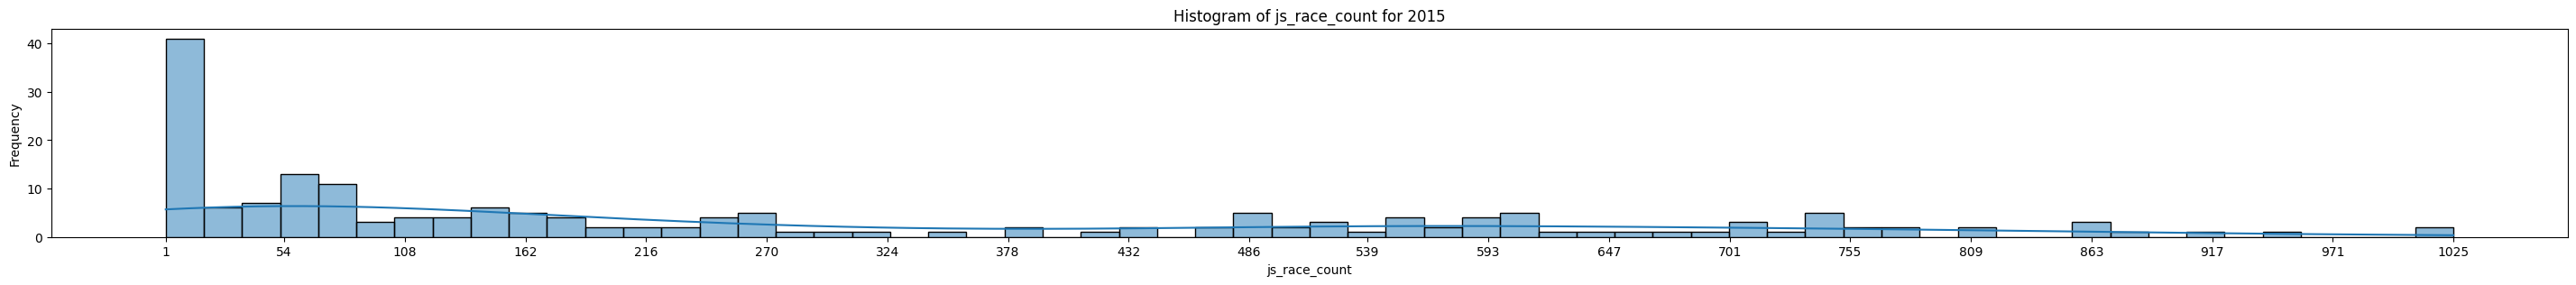

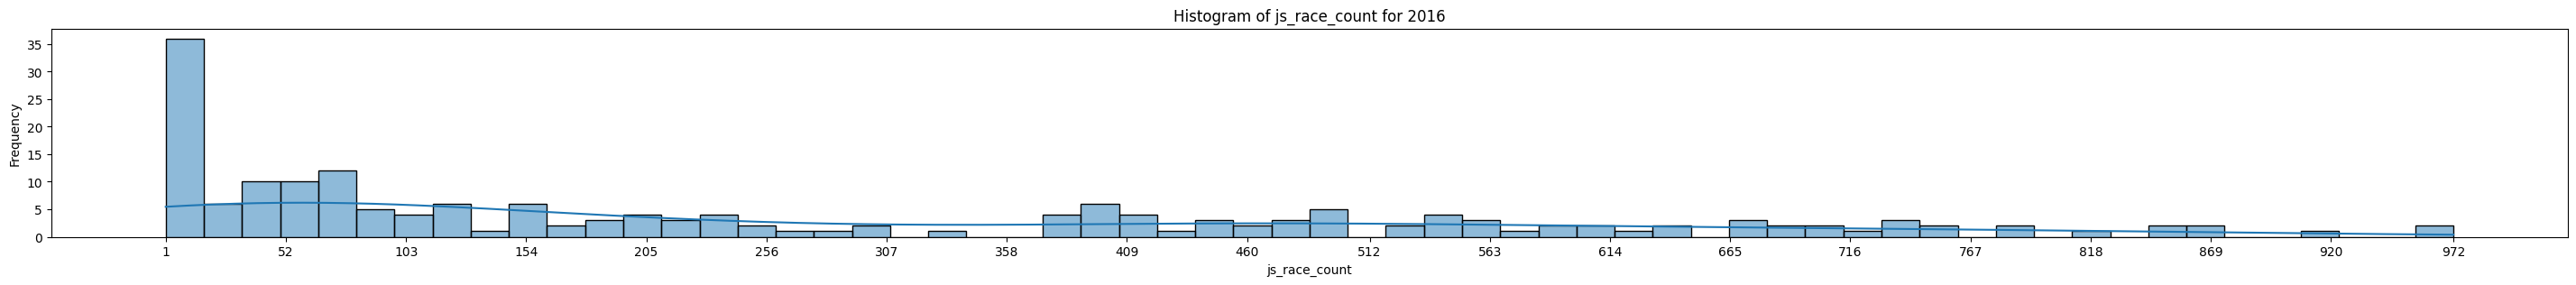

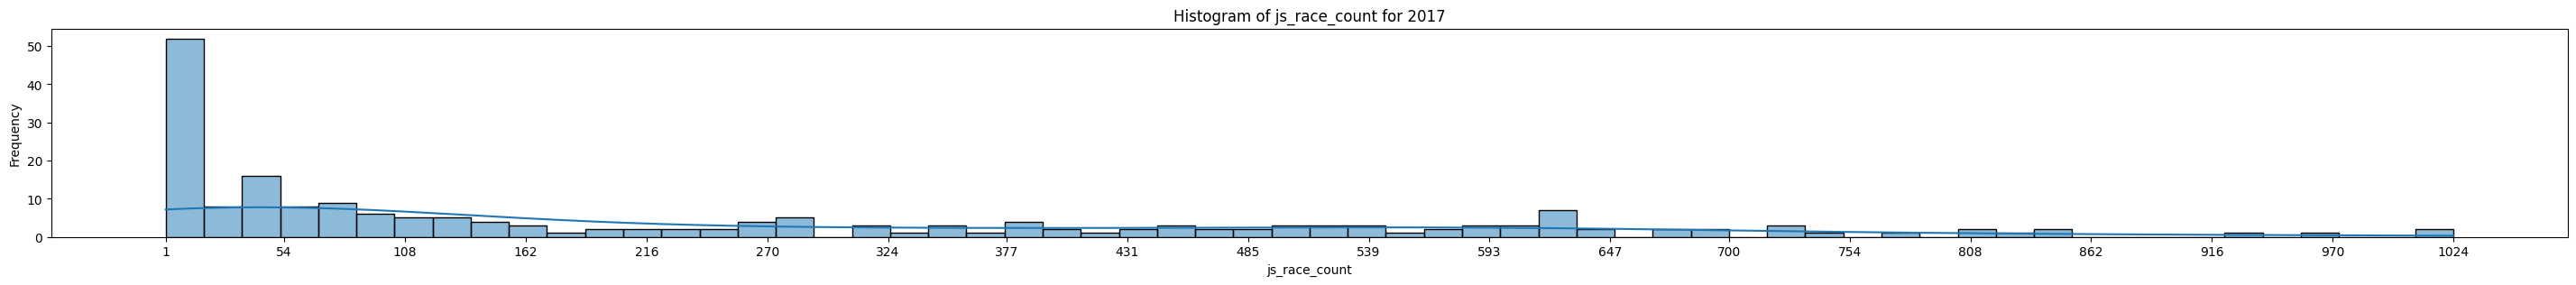

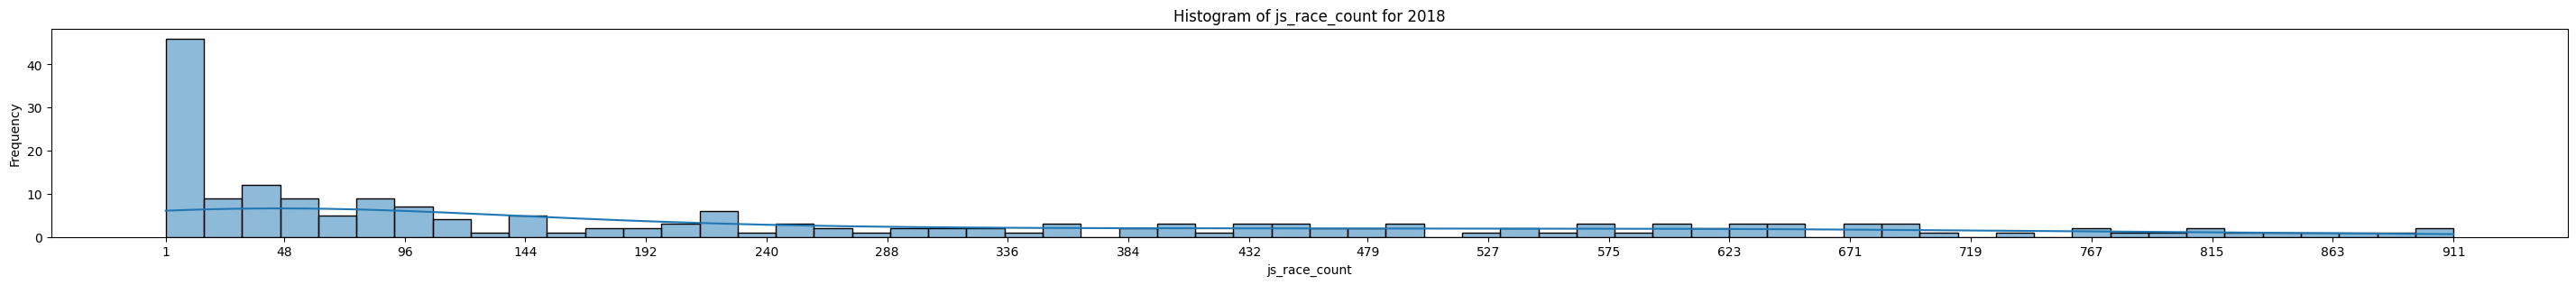

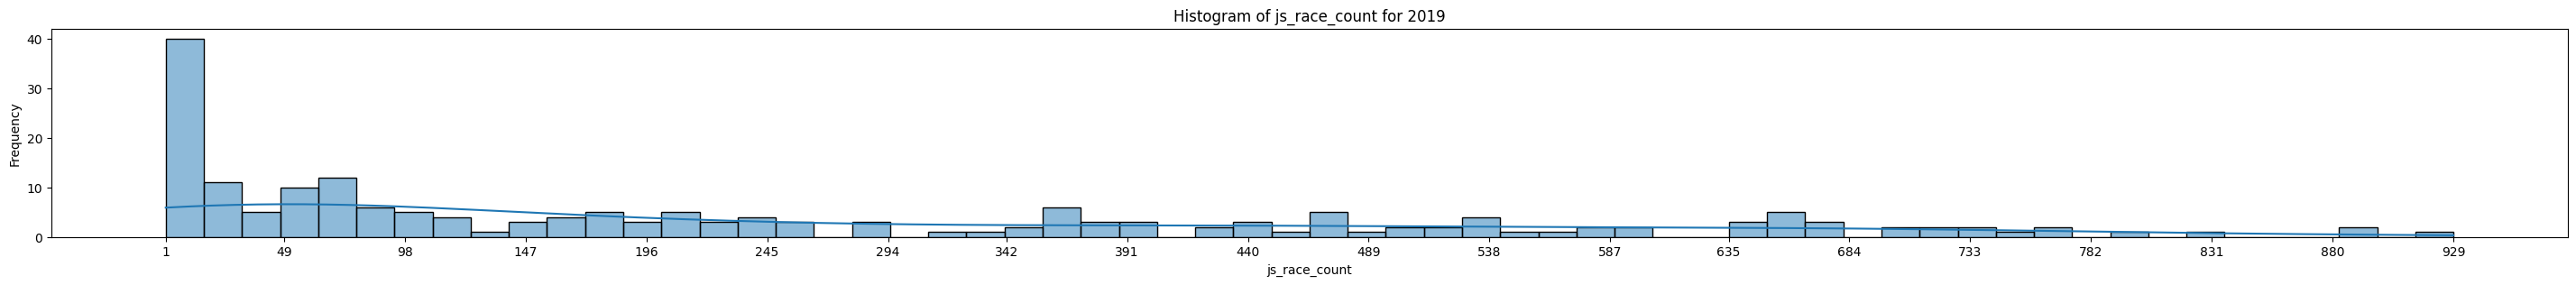

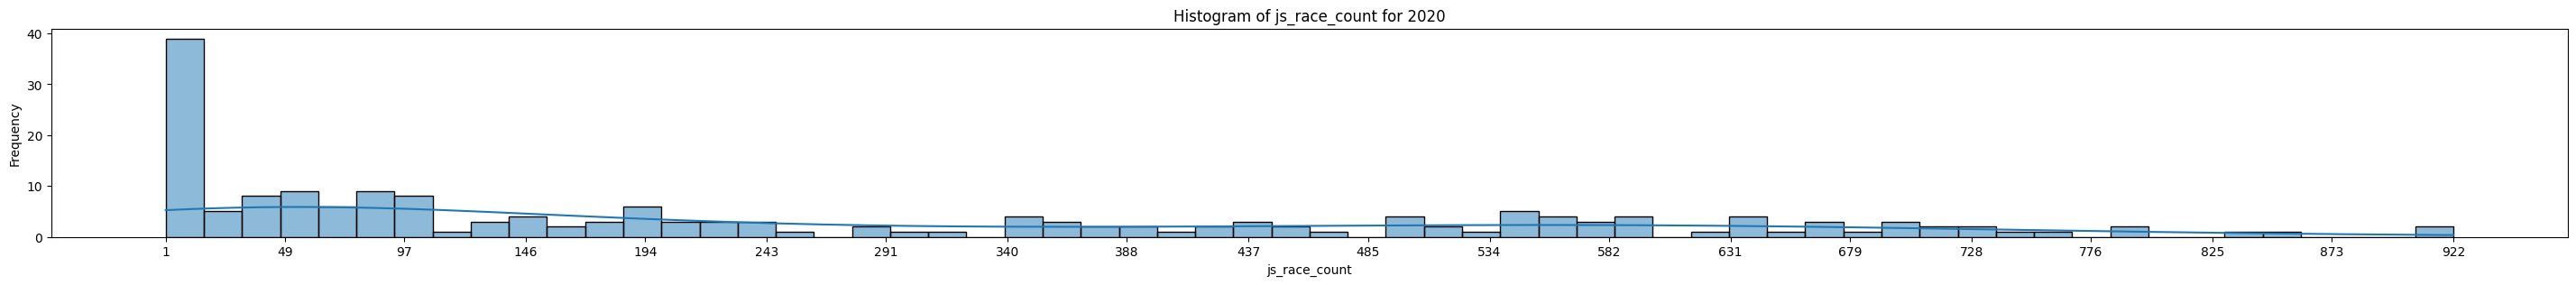

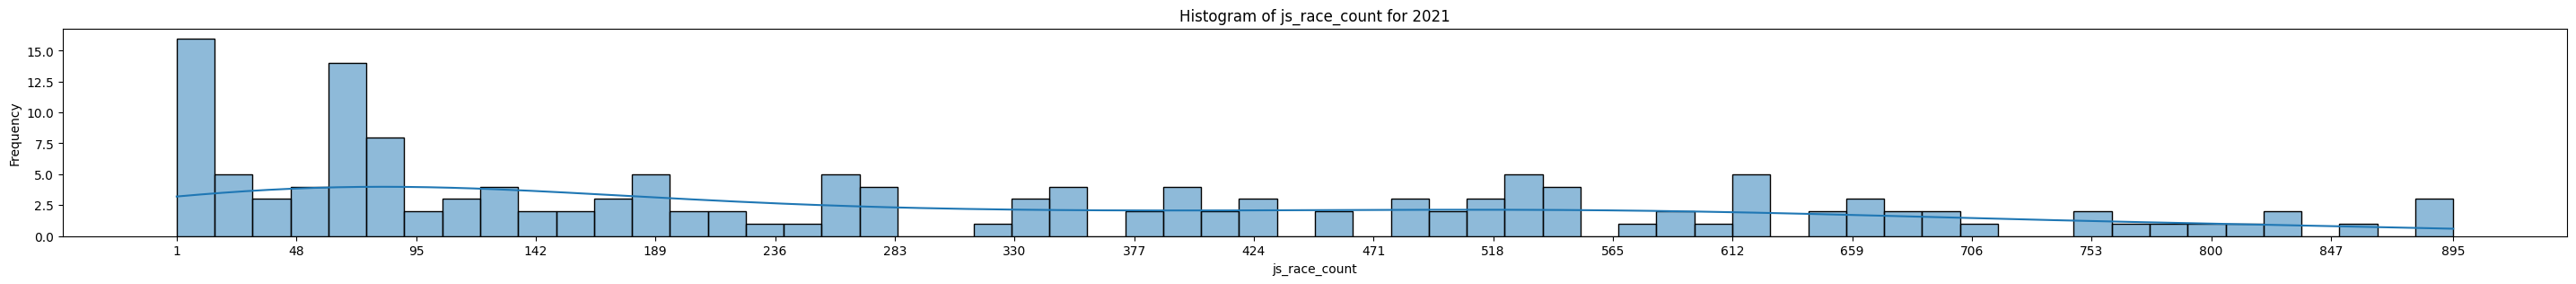

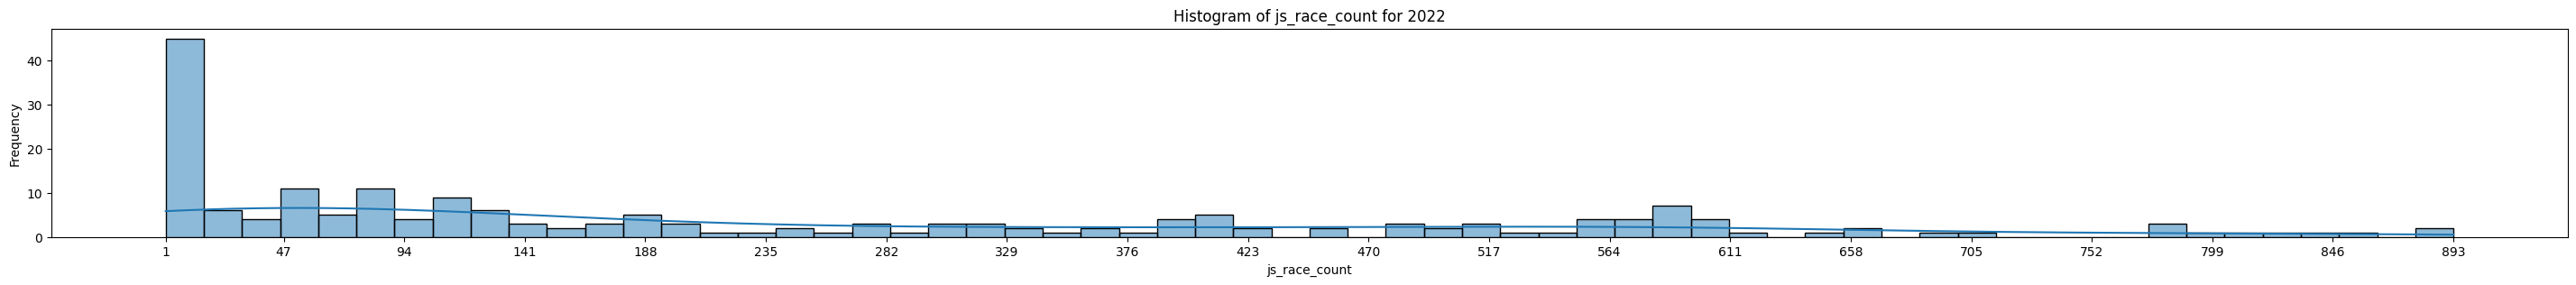

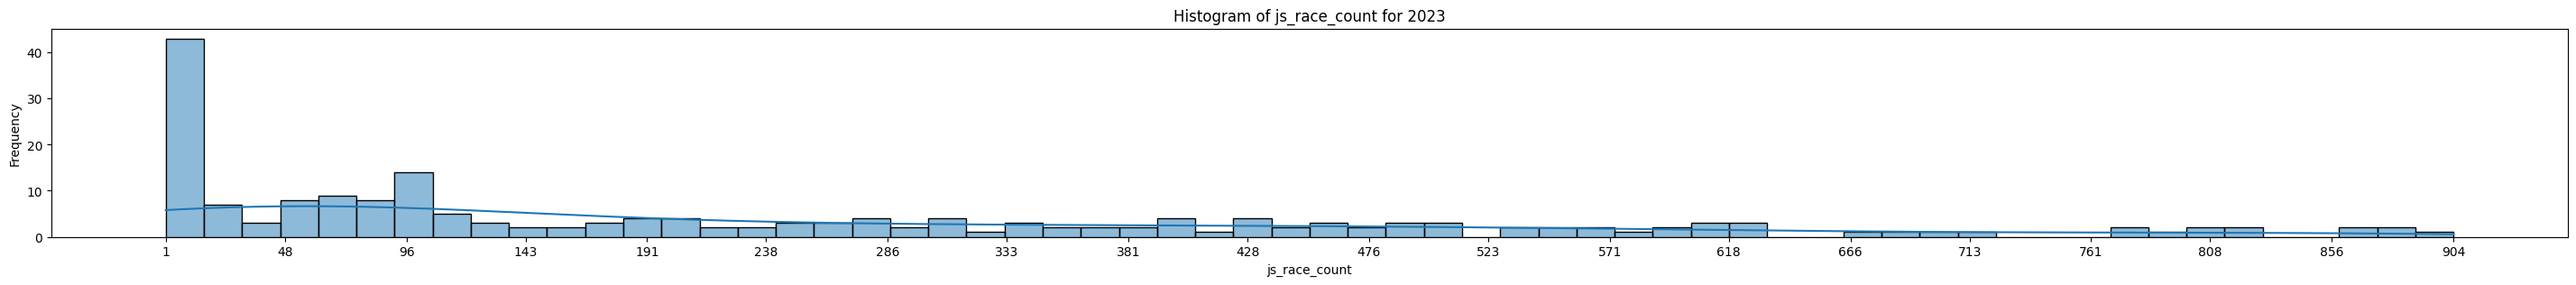

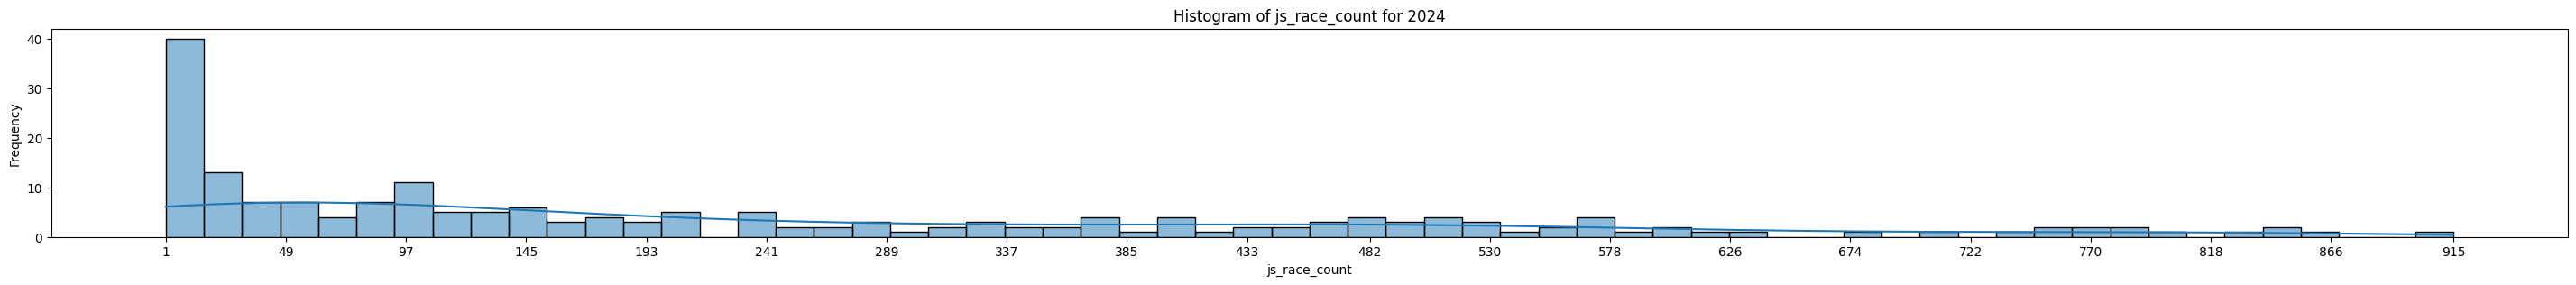

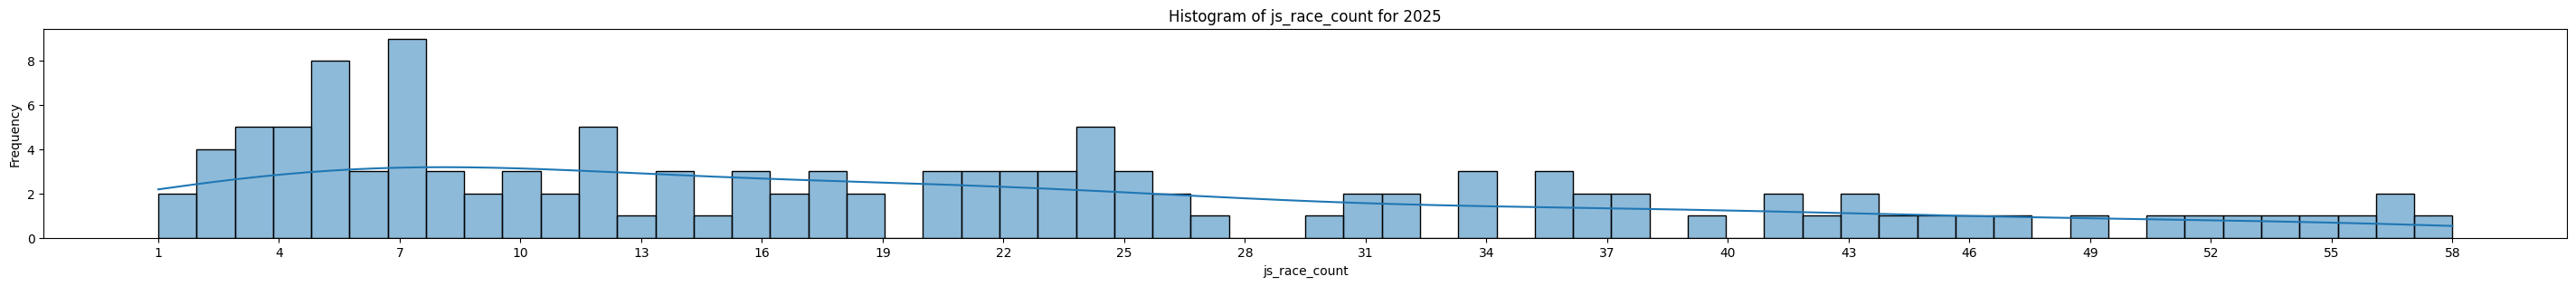

In [27]:
k_a_util.prepare_pd_on_notebook()
dict_statistics = {}
filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_score.accdb'
df_summary = k_a_util.read_table(filepath, table_name)
df_summary = df_summary[df_summary['js_id'] != '00000']
df_summary = df_summary.sort_values(by='js_year')
df_group_y = df_summary.groupby('js_year')

for year, group in df_group_y:
    plt.figure(figsize=(36, 3))
    group['js_race_count'] = group['js_race_count'].astype(int)
    group = group.sort_values(by='js_race_count')

    # ヒストグラムを描画
    sns.histplot(group['js_race_count'], bins=60, kde=True)

    # X軸の目盛りを設定
    max_count = group['js_race_count'].max()
    min_count = group['js_race_count'].min()
    plt.xticks(np.linspace(min_count, max_count, 20, dtype=int))

    plt.title(f'Histogram of js_race_count for {year}')
    plt.xlabel('js_race_count')
    plt.ylabel('Frequency')
    plt.show()

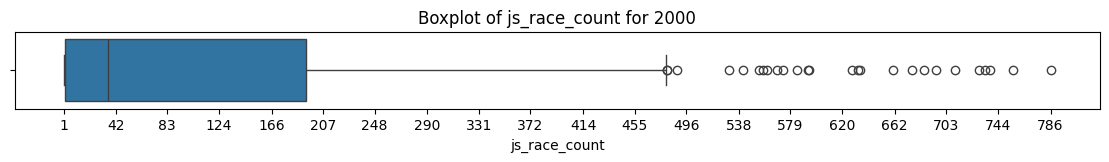

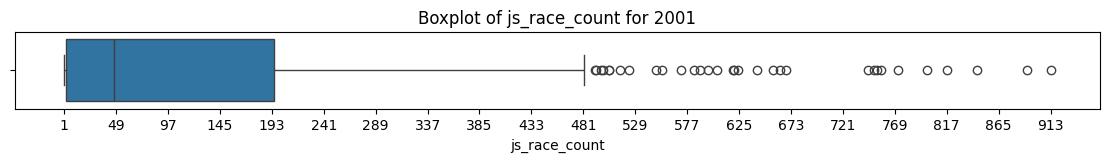

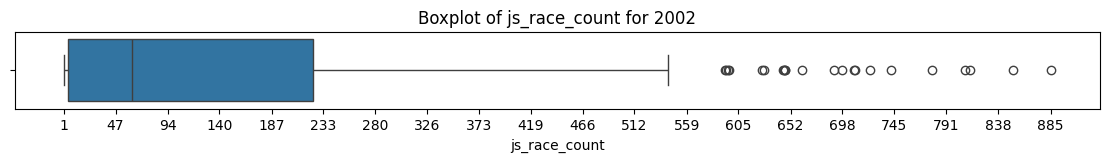

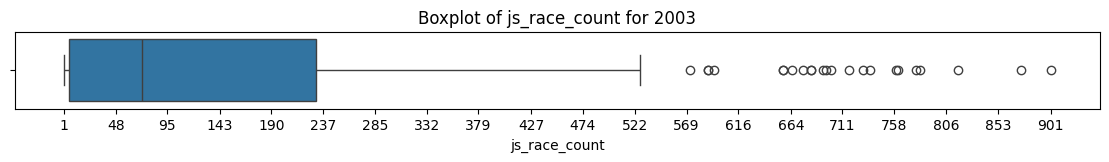

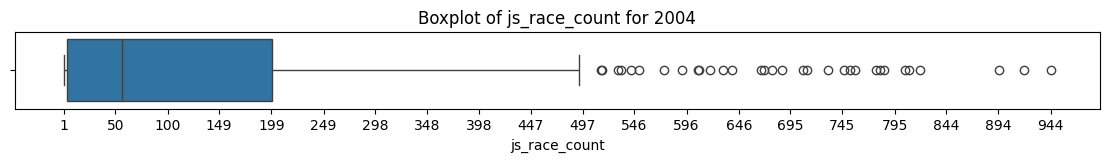

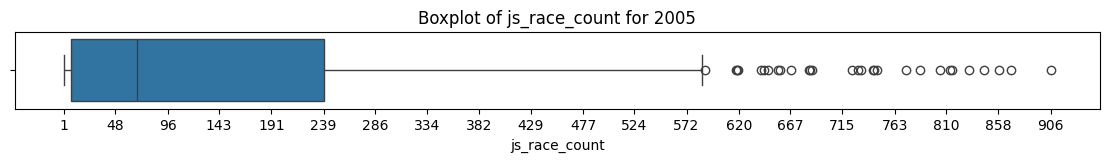

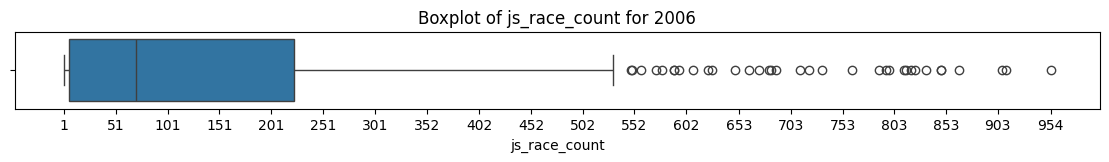

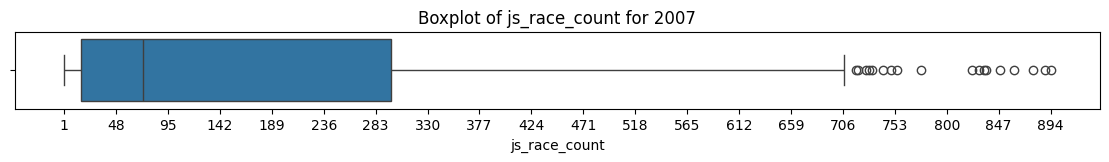

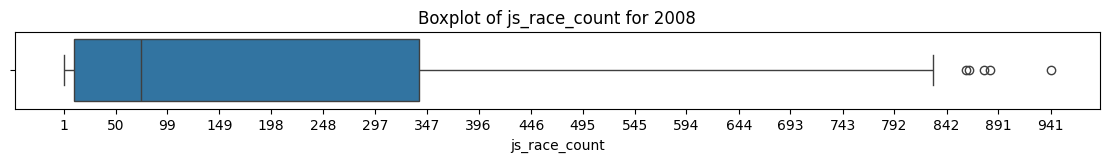

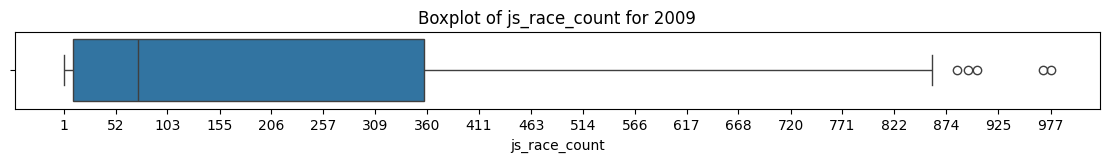

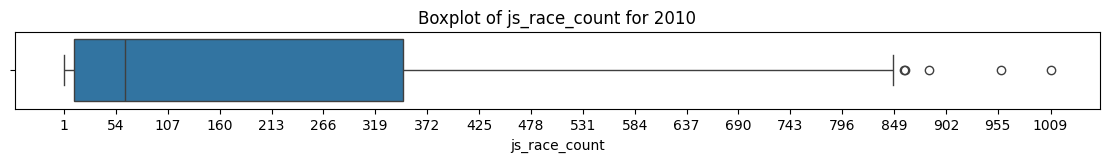

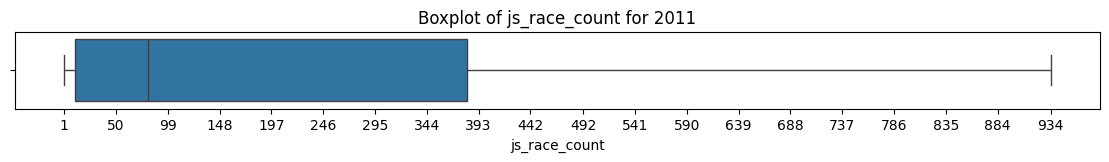

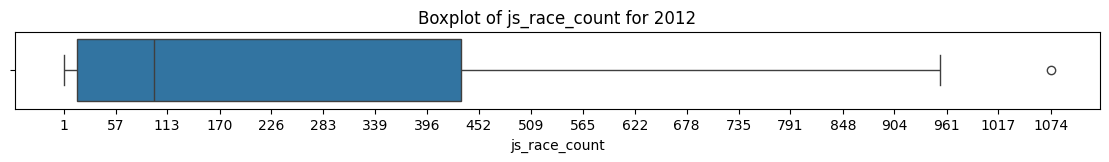

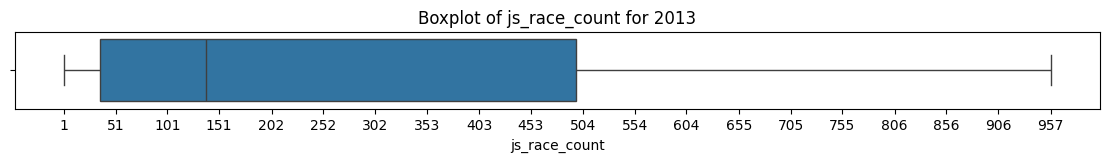

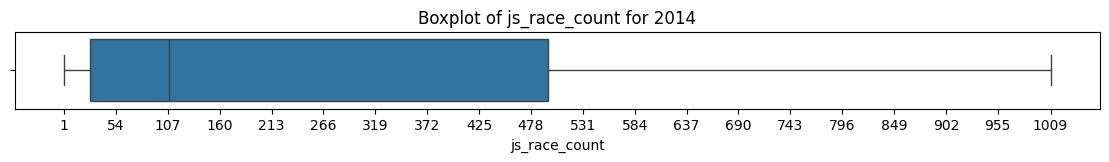

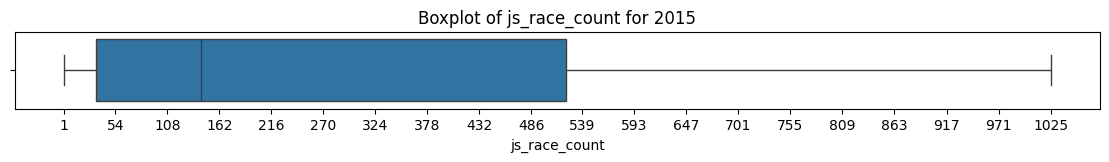

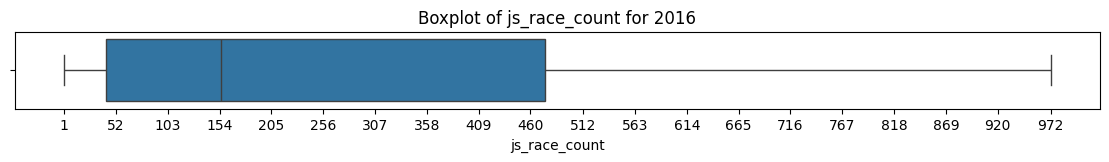

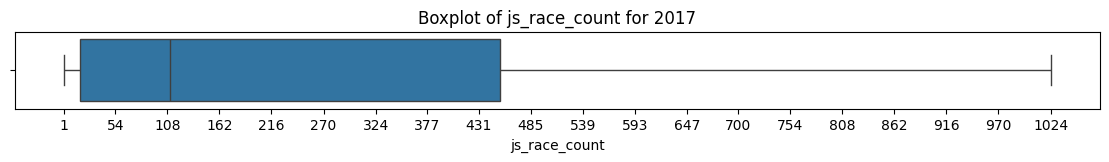

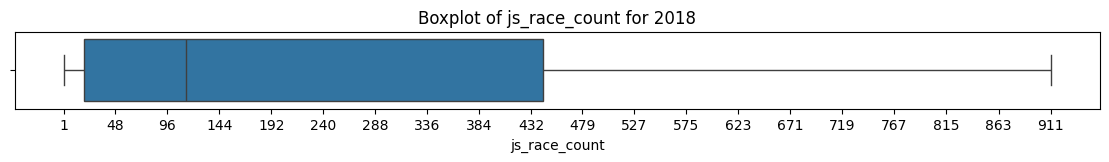

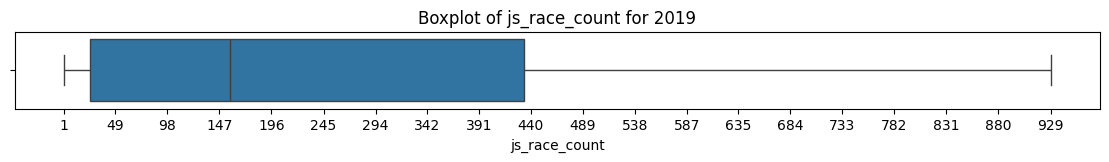

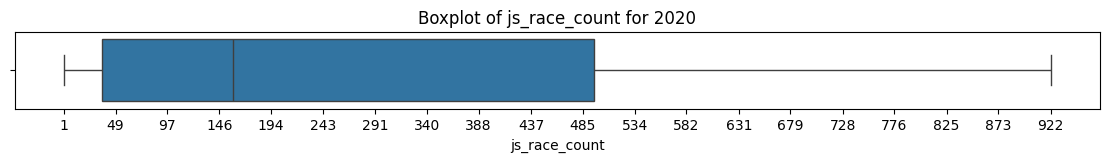

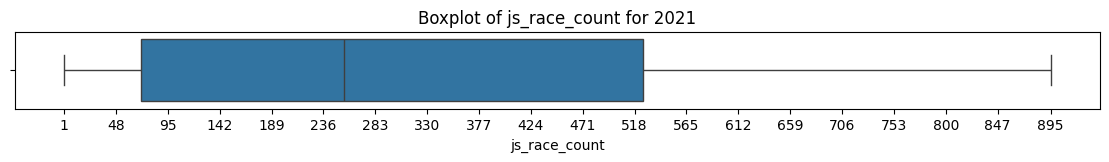

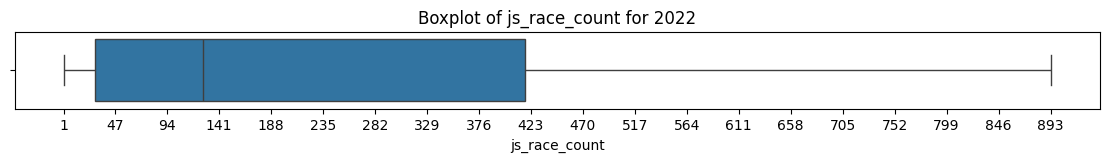

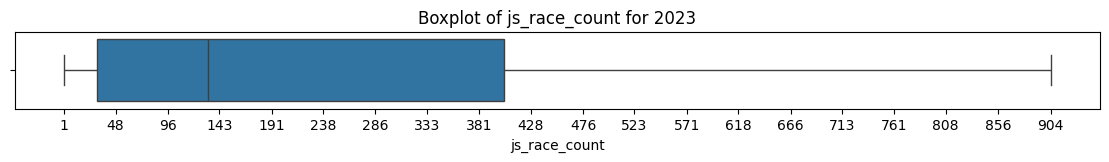

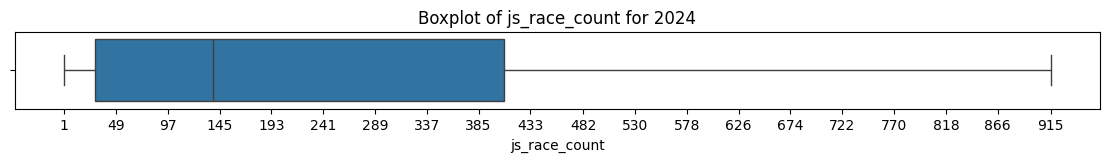

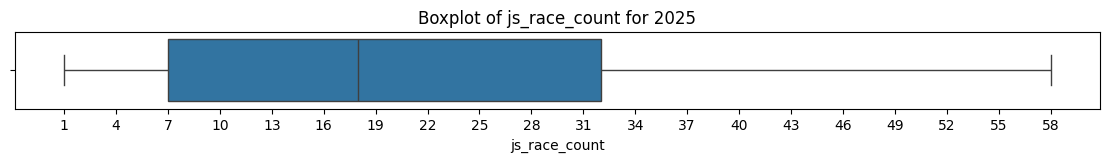

In [59]:


# import warnings
# from google.colab import drive
# import sys
# import numpy as np
# import pandas as pd
# from google.colab import files
# import os
# import subprocess
# from io import StringIO  # StringIOを正しくインポート
# import model.utility.k_analysis_util as k_a_util
# from IPython.display import display
# import matplotlib.pyplot as plt
# import seaborn as sns

# !apt update
# !pip install mdbtools-dev
# !apt-get install mdbtools
# !pip install pandas pyodbc
# !pip install tempfile2
# warnings.filterwarnings('ignore')
# drive.mount('/content/drive')
# sys.path.append('/content/drive/MyDrive/Dev/py2/')



# 使用例
table_name = 'JockeyScore'  # テーブル名を指定

years = range(2000, 2026)

k_a_util.prepare_pd_on_notebook()

dict_statistics={}
filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_score.accdb'
df_summary = k_a_util.read_table(filepath, table_name)
df_summary = df_summary[df_summary['js_id'] != '00000']
df_summary = df_summary.sort_values(by='js_year')


df_group_y = df_summary.groupby('js_year')

for year, group in df_group_y:
  plt.figure(figsize=(14, 1))
  group['js_race_count'] = group['js_race_count'].astype(int)
  group = group.sort_values(by='js_race_count')

  # 箱ひげ図を描画
  sns.boxplot(x='js_race_count', data=group)

  # X軸の目盛りを設定
  max_count = group['js_race_count'].max()
  min_count = group['js_race_count'].min()
  plt.xticks(np.linspace(min_count, max_count, 20, dtype=int))

  plt.title(f'Boxplot of js_race_count for {year}')
  plt.xlabel('js_race_count')
  plt.show()


In [61]:

# データの読み込みと前処理
df_summary = k_a_util.read_table(filepath, table_name)
df_summary = df_summary[df_summary['js_id'] != '00000']
df_summary = df_summary.sort_values(by='js_year')

# 列名リスト
columns = ['js_race_count', 'js_win_score', 'js_mul_score', 'js_win_count', 'js_mul_count']

# 各列の基本統計量の計算
yearly_statistics_dict = calculate_yearly_statistics_per_column(df_summary, columns)

# 結果を表示
for column, stats_df in yearly_statistics_dict.items():
    print(f"Statistics for {column}:")
    print(stats_df)
    print("\n")


Statistics for js_race_count:
       mean    std     max  min  median  mode
2000 130.79 184.54  786.00 1.00   36.00  1.00
2001 134.37 192.22  913.00 1.00   43.00  1.00
2002 145.73 201.84  913.00 1.00   54.50  1.00
2003 157.23 205.09  901.00 1.00   67.00  1.00
2004 157.55 212.24  944.00 1.00   66.50  1.00
2005 163.42 224.70  944.00 1.00   63.00  1.00
2006 175.72 236.96  954.00 1.00   69.00  1.00
2007 187.77 245.20  954.00 1.00   72.00  1.00
2008 201.36 252.75  941.00 1.00   73.50  1.00
2009 206.48 261.18  977.00 1.00   74.00  1.00
2010 205.36 264.48 1009.00 1.00   68.50  1.00
2011 210.72 266.52 1009.00 1.00   71.00  1.00
2012 231.68 276.03 1074.00 1.00   83.00  1.00
2013 259.12 287.91 1074.00 1.00  117.00  1.00
2014 266.89 287.09 1009.00 1.00  119.50  1.00
2015 264.80 283.81 1025.00 1.00  122.50  1.00
2016 269.78 277.44 1025.00 1.00  154.00  1.00
2017 254.89 268.41 1024.00 1.00  130.00  2.00
2018 244.51 267.35 1024.00 1.00  112.50  1.00
2019 245.82 259.27  929.00 1.00  129.00  1.00
2020